## Importing required libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox
import statsmodels.formula.api as smf
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

In [70]:
#storing the file path/ url path in a variable
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"

#make dataframe of the data
df0 = pd.read_csv(url)

## 01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info()

In [71]:
#read top 5 rows of the data
df0.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [72]:
#read last 5 rows of the data
df0.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [73]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(30, 17)
 
W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


In [74]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### data set has 30 rows and 17 columns

## 02. Checking for duplicate entries

In [75]:
df0.duplicated().sum()

0

### there is no duplicate values in this data set

## 03. Checking for descriptive statistics.

In [76]:
df0.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## observation
####  1. all data are continuous 
####  2. Win is our target value 

## 04. Checking for missing & null values..

In [77]:
#total missing values
df0.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [78]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

### there is no null values in this data set

## 05. Checking entries with ZERO Value.

In [79]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

### there is no Zero entries in this data set

# EDA : Numerical Feature Analysis

In [80]:
#Copying dataframe
df1 = df0.copy()

## 06. Data Visualization.

## 1 

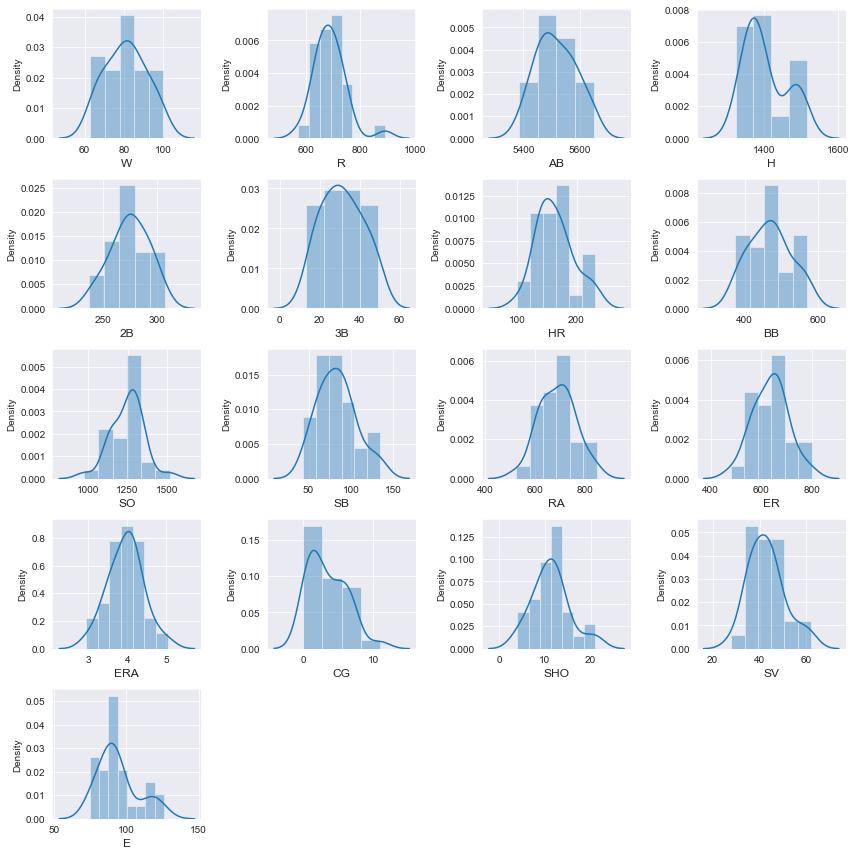

In [81]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(12,12))
for column in df1[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].columns:
    plt.subplot(5,4,i+1)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

In [82]:
df1['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

## 07. Checking outliers..

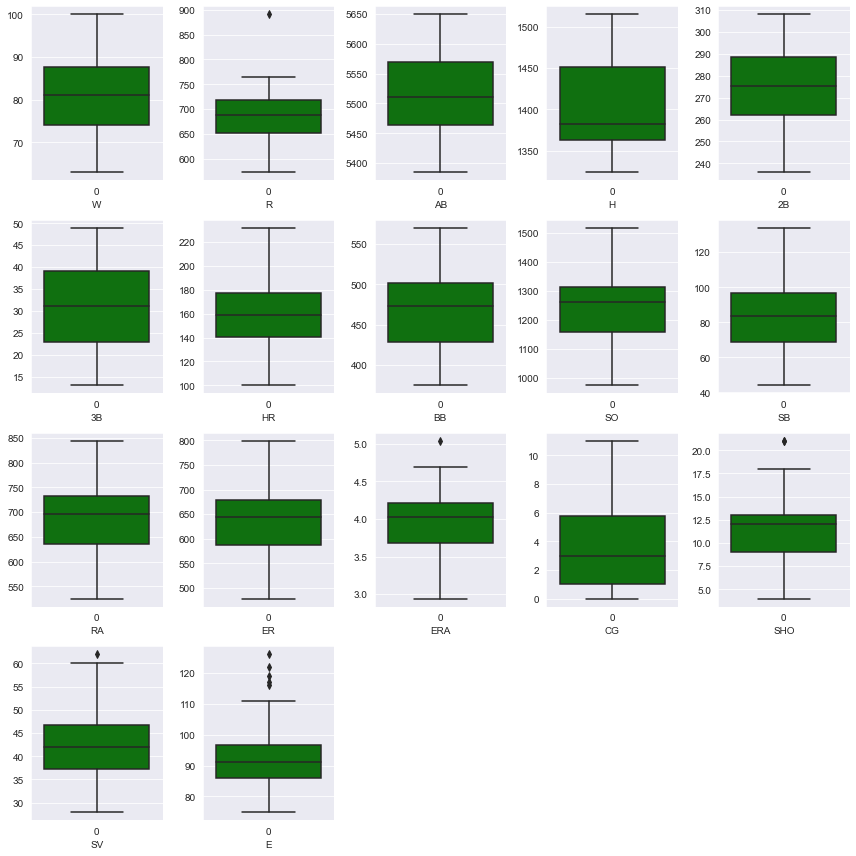

In [83]:
collist=df1[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].columns.values

plt.figure(figsize=(12,12))
for i in range(0,17):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df1[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

In [84]:
df2 = df1.copy()

In [85]:
z=np.abs(zscore(df2))
df3=df2[(z<3).all(axis=1)]
data_loss=((df2.shape[0]-df3.shape[0])/df2.shape[0])*100
print("data loss ", data_loss, " %")

data loss  3.3333333333333335  %


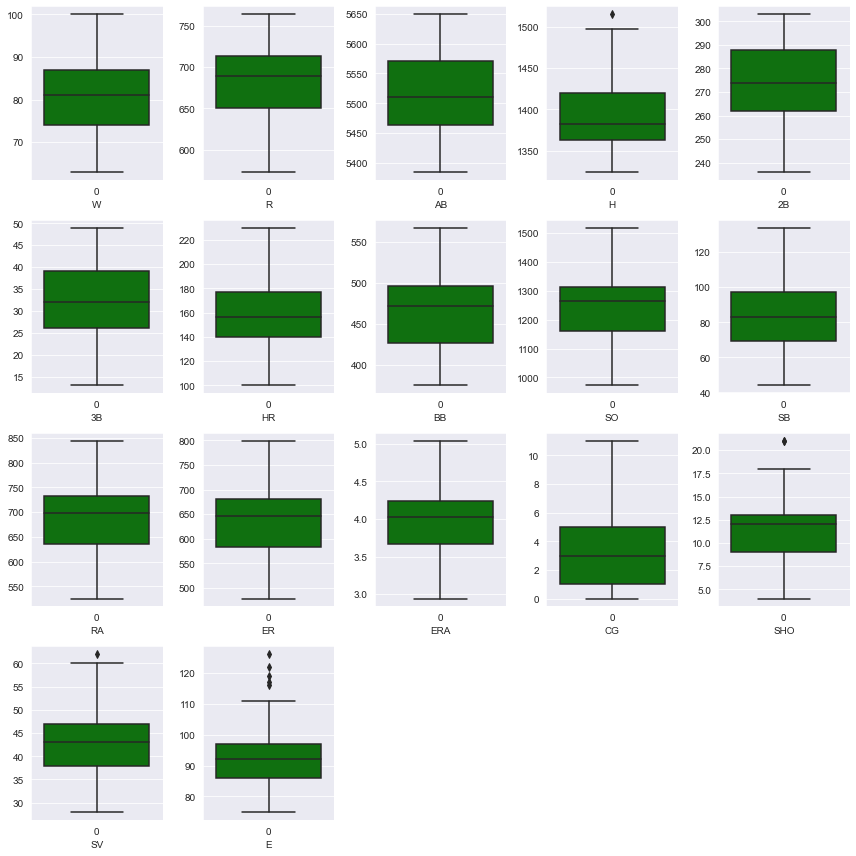

In [86]:
collist=df3[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].columns.values

plt.figure(figsize=(12,12))
for i in range(0,17):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df3[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## 08. Checking Skewness..

In [87]:
df3.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [88]:
df3.shape

(29, 17)

In [89]:
from scipy.stats import skew
from scipy import stats

W
0.11276693557129294


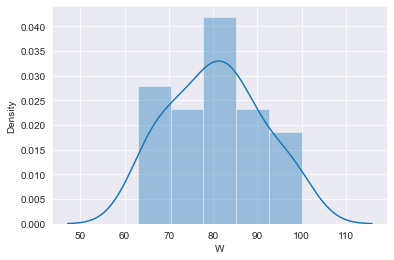

R
-0.20406011203640076


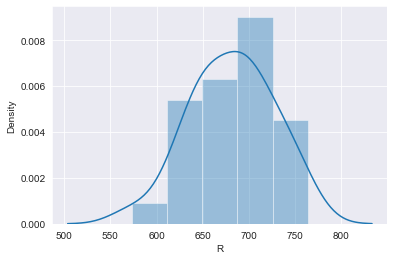

AB
0.16067299318317793


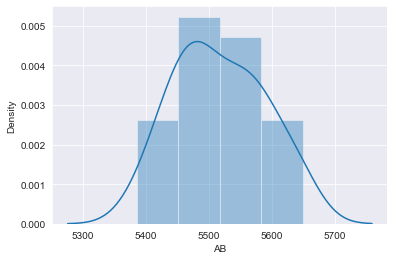

H
0.7426353382402017


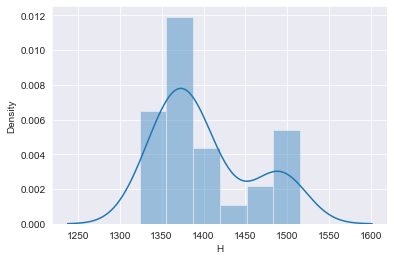

2B
-0.31770525706395997


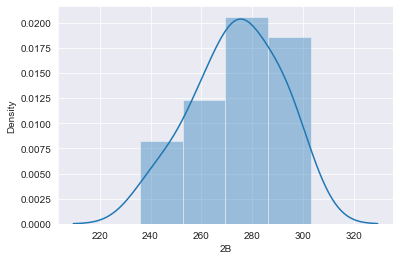

3B
0.08539410248772253


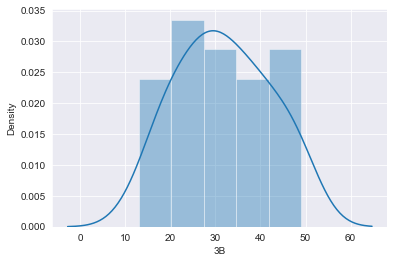

HR
0.427197772372019


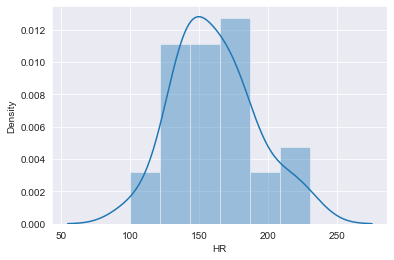

BB
0.14325736043584017


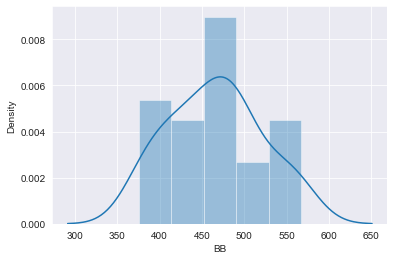

SO
-0.2215429668493466


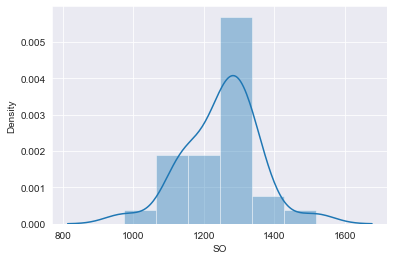

SB
0.46898711615548905


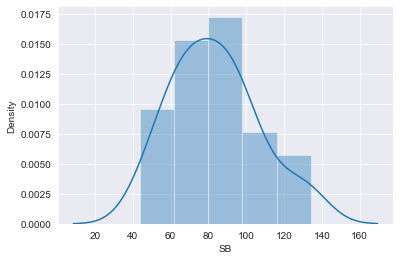

RA
0.017202289030994758


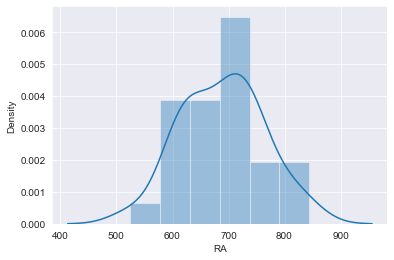

ER
0.017492051216126122


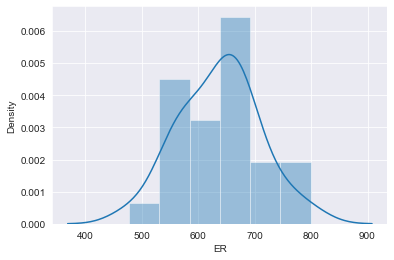

ERA
0.01581706170438952


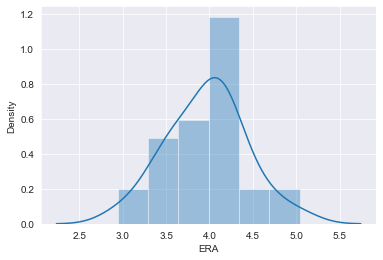

CG
0.8101053438609993


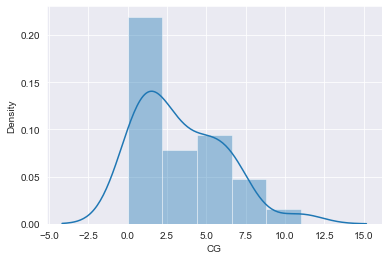

SHO
0.49928605613953103


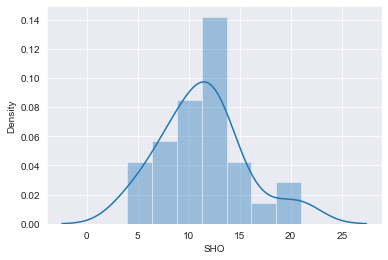

SV
0.5945467030287168


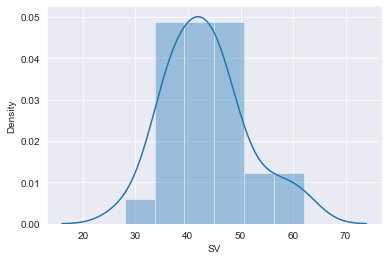

E
0.7961689324660232


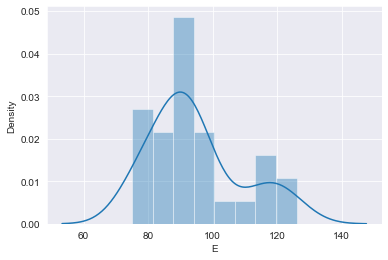

In [90]:
for col in df3:
    print(col)
    print(skew(df3[col]))
    
    
    plt.figure()
    sns.distplot(df3[col])
    plt.show()

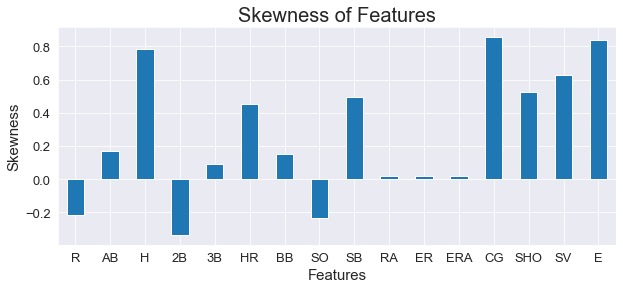

In [91]:
plt.figure(figsize=(10,4))
df3.skew().drop(['W']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

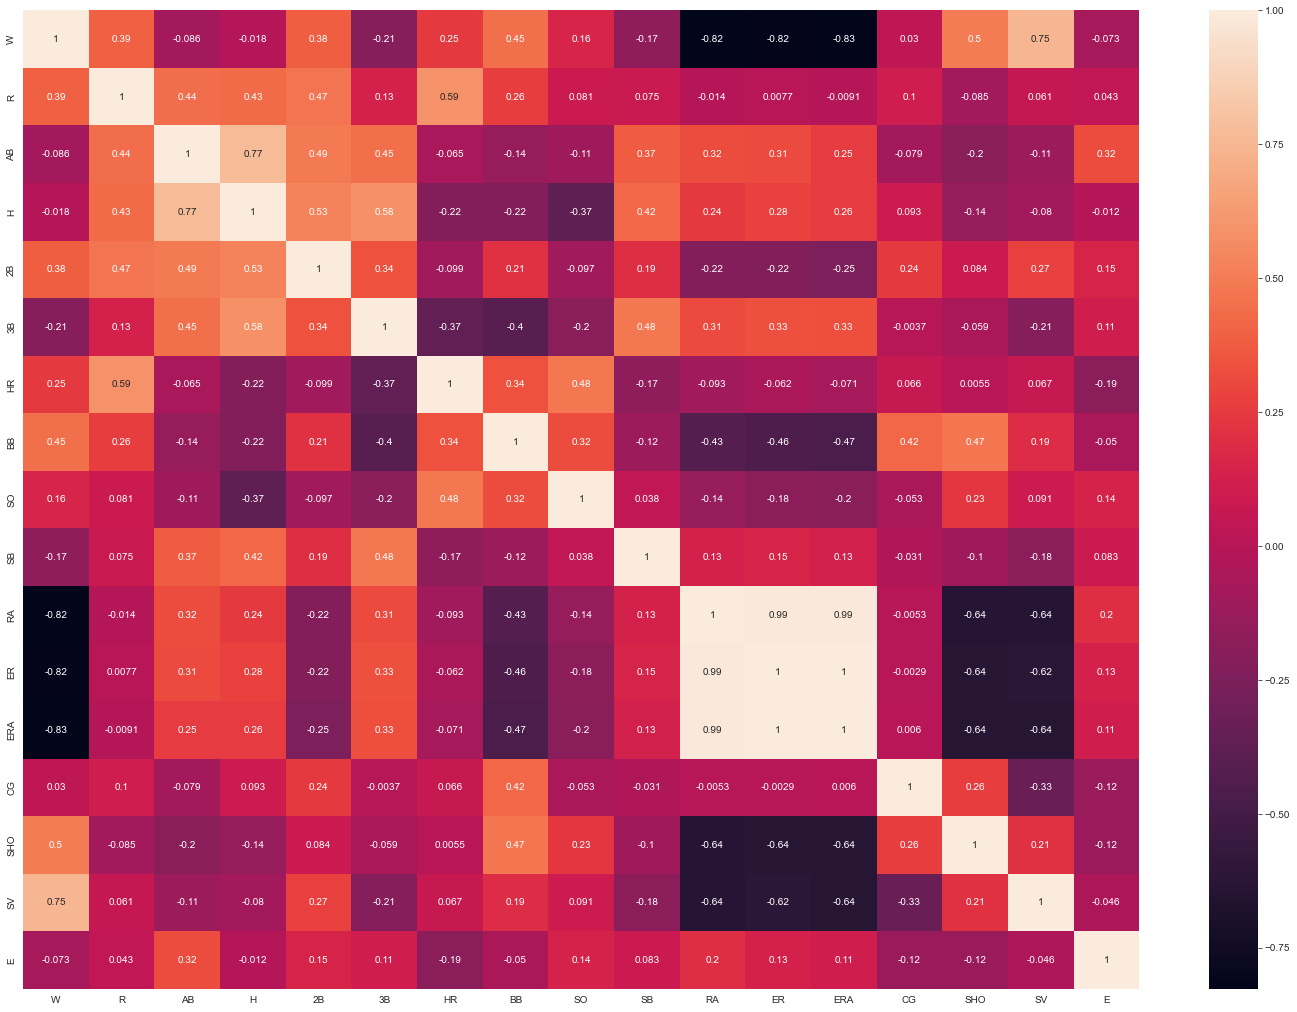

In [92]:
plt.figure(figsize = (25,18))
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [93]:
df4 = df3.copy()

In [94]:
df4[['H','CG','SV','E']]=np.sqrt(df4[['H','CG','SV','E']])

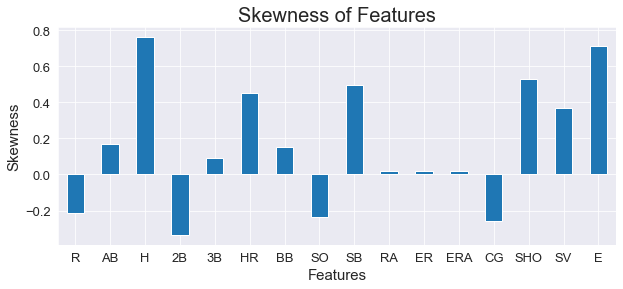

In [95]:
plt.figure(figsize=(10,4))
df4.skew().drop(['W']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

In [104]:
df5=df4.copy()

In [105]:
from sklearn.preprocessing import PowerTransformer

In [106]:
pt= PowerTransformer(method='box-cox')
df5[['H','E']]=pt.fit_transform(df5[['H','E']])

In [108]:
df5.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.370280
E      0.065150
dtype: float64

##  Preparing data for ML model

## Applying StandardScaler..

In [110]:
X=df5.drop('W',axis=1)
X
y=df5['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
y_test = np.array(y_test,dtype = float)

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [113]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [114]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [115]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## 1.Linear Regression

Explained_variance:  0.8456
R2:  0.8446
Adjusted_r2:  1.1208
MAE:  3.2163
MSE:  16.5363
RMSE:  4.0665
Accuracy: -18994.09 %
Standard Deviation: 35793.68 %


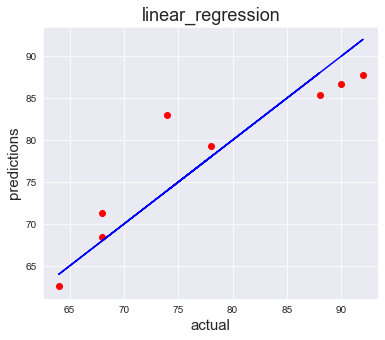

In [116]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

# 2. Random Forest Regression Model

Explained_variance:  0.7097
R2:  0.6992
Adjusted_r2:  1.2339
MAE:  4.4938
MSE:  32.0141
RMSE:  5.6581
Accuracy: 11.50 %
Standard Deviation: 46.12 %


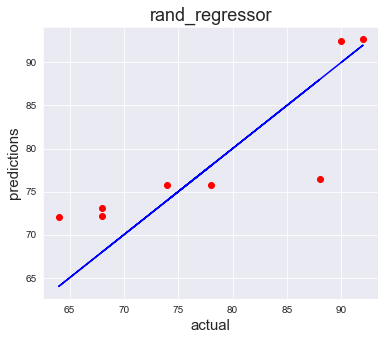

In [117]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rf, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('rand_regressor', fontsize = 18)
plt.show()

# 3. Decision Tree Regression Model

Explained_variance:  0.2368
R2:  0.2355
Adjusted_r2:  1.5946
MAE:  7.125
MSE:  81.375
RMSE:  9.0208
Accuracy: -171.58 %
Standard Deviation: 255.03 %


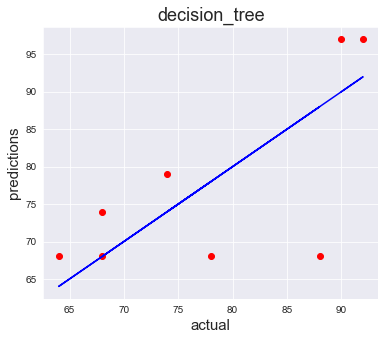

In [118]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_dt, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('decision_tree', fontsize = 18)
plt.show()


# 4.SVR model

Explained_variance:  0.1716
R2:  0.102
Adjusted_r2:  1.6984
MAE:  8.9706
MSE:  95.5801
RMSE:  9.7765
Accuracy: -20.94 %
Standard Deviation: 31.94 %


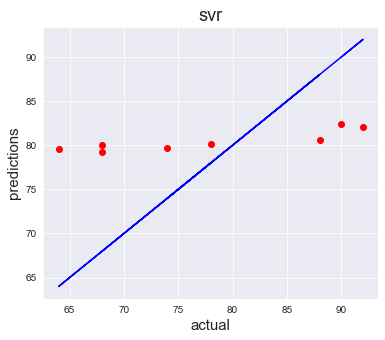

In [119]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_svr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('svr', fontsize = 18)
plt.show()

# 5.KNeighborsRegressor model

Explained_variance:  0.5521
R2:  0.5508
Adjusted_r2:  1.3494
MAE:  5.625
MSE:  47.8125
RMSE:  6.9147
Accuracy: 18.57 %
Standard Deviation: 32.92 %


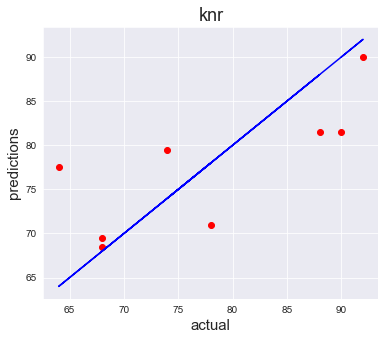

In [120]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_knr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knr', fontsize = 18)
plt.show()

# 6.XGBRegressor model

Explained_variance:  0.4979
R2:  0.4937
Adjusted_r2:  1.3938
MAE:  5.5802
MSE:  53.8905
RMSE:  7.341
Accuracy: 35.24 %
Standard Deviation: 30.56 %


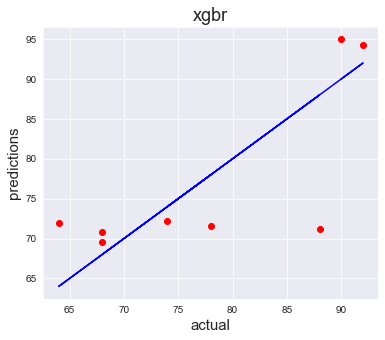

In [121]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

In [122]:
from sklearn.linear_model import Ridge, Lasso

# 7.Lasso

Explained_variance:  0.8217
R2:  0.8168
Adjusted_r2:  1.1425
MAE:  3.504
MSE:  19.4985
RMSE:  4.4157
Accuracy: 62.92 %
Standard Deviation: 29.87 %


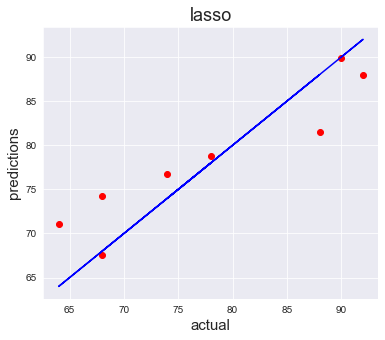

In [123]:
ls = Lasso()
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

regression_results(y_test,y_pred_ls)
model_accuracy(ls)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_ls, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('lasso', fontsize = 18)
plt.show()

# 8.Ridge

Explained_variance:  0.9091
R2:  0.9088
Adjusted_r2:  1.0709
MAE:  2.5726
MSE:  9.7074
RMSE:  3.1157
Accuracy: 31.51 %
Standard Deviation: 74.07 %


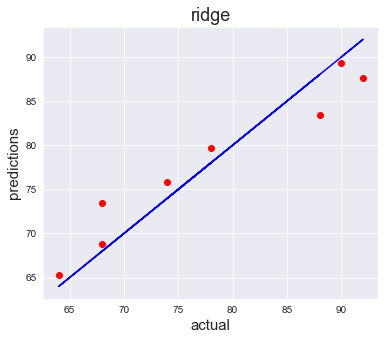

In [124]:
rd = Ridge()
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

regression_results(y_test,y_pred_rd)
model_accuracy(rd)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rd, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('ridge', fontsize = 18)
plt.show()

# 9.GradientBoostingRegressor

Explained_variance:  0.5587
R2:  0.5548
Adjusted_r2:  1.3463
MAE:  5.7009
MSE:  47.3838
RMSE:  6.8836
Accuracy: 1.00 %
Standard Deviation: 53.50 %


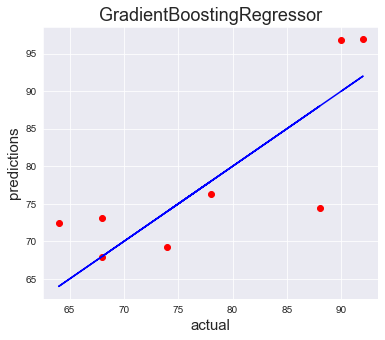

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

regression_results(y_test,y_pred_gbr)
model_accuracy(gbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_gbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('GradientBoostingRegressor', fontsize = 18)
plt.show()

# 10.AdaBoostRegressor

Explained_variance:  0.6596
R2:  0.6159
Adjusted_r2:  1.2987
MAE:  5.5938
MSE:  40.8828
RMSE:  6.394
Accuracy: 5.11 %
Standard Deviation: 34.76 %


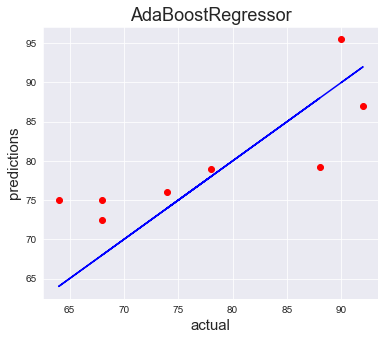

In [127]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)

regression_results(y_test,y_pred_abr)
model_accuracy(abr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_abr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('AdaBoostRegressor', fontsize = 18)
plt.show()

## Among the all models lasso model has highest accuracy and we will tune this for the enhancement of its accuracy.

# Hyperparameter tuning using GridSearchCV

In [133]:
parameters = {'alpha':[0, 1, 0.01],
              }

In [134]:
grd = GridSearchCV(ls, param_grid = parameters, cv =10, verbose=True, n_jobs=-1)

In [135]:
best_clf = grd.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [136]:
best_clf.best_estimator_

Lasso(alpha=1)

In [137]:
best_clf.best_params_

{'alpha': 1}

Explained_variance:  0.8217
R2:  0.8168
Adjusted_r2:  1.1425
MAE:  3.504
MSE:  19.4985
RMSE:  4.4157
Accuracy: 62.92 %
Standard Deviation: 29.87 %


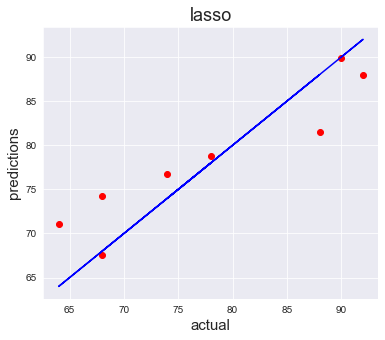

In [138]:
ls = Lasso(alpha=1)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

regression_results(y_test,y_pred_ls)
model_accuracy(ls)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_ls, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('lasso', fontsize = 18)
plt.show()

In [139]:
filename='baseball.pkl'
pickle.dump(ls,open(filename,'wb'))

In [140]:
log =pickle.load(open('baseball.pkl','rb'))
score=log.score(X_test, y_test)
print(score*100)

81.68079946285978
